In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('/content/drive/MyDrive/Zomato data .csv')
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

# pd.apply() this method allows to pass function to apply on the every single
# value in the pandas series or particular column

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [4]:
dataframe.info() # it gives the summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
dataframe.isna().sum() # here we check for any null values in the dataframe

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type of Restaurant')

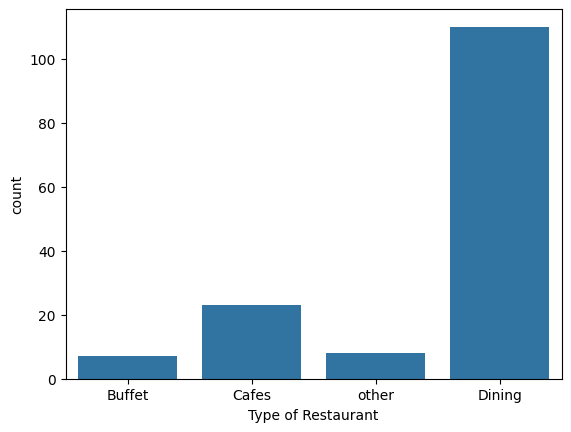

In [6]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

From the above count plot, we find that majority of the restaurants fall under dining category.

In [7]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
print(grouped_data) # voting for different types of restaurent

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


Text(0, 0.5, 'Votes')

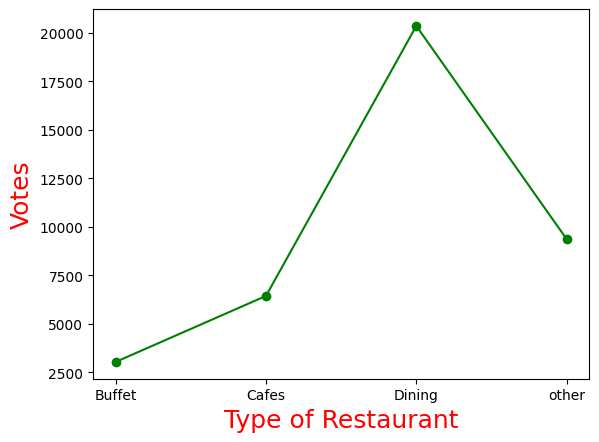

In [8]:
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel("Type of Restaurant", c='red', size='18')
plt.ylabel('Votes', c='red', size='18')

From the above plot we could conclude that dining restaurants are preferred by large number of individulas.  

Now we going to find the restaurant's name that received maximum number of votes based on given datafram.

In [9]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[
    dataframe['votes'] == max_votes,
    ['name', 'votes']
    ]
print(restaurant_with_max_votes)

                 name  votes
38  Empire Restaurant   4884


From the above result we find that restaurant **Empire Restaurant** has maximum no. of votes 4884

<Axes: xlabel='online_order', ylabel='count'>

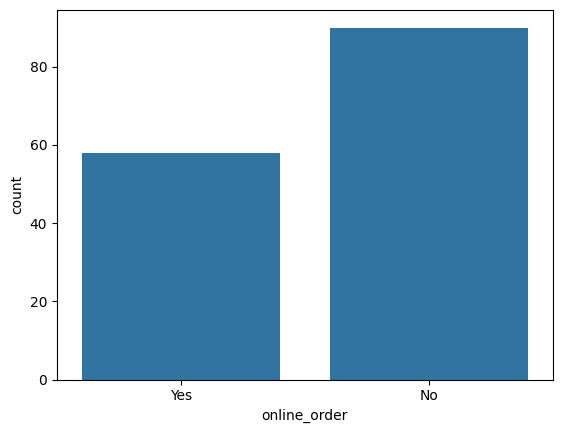

In [10]:
# online order column to find ordered from online or not
sns.countplot(x=dataframe['online_order'])

This count plot suggests that majority of the restaurants does't accept online order.

<Axes: xlabel='rate', ylabel='Count'>

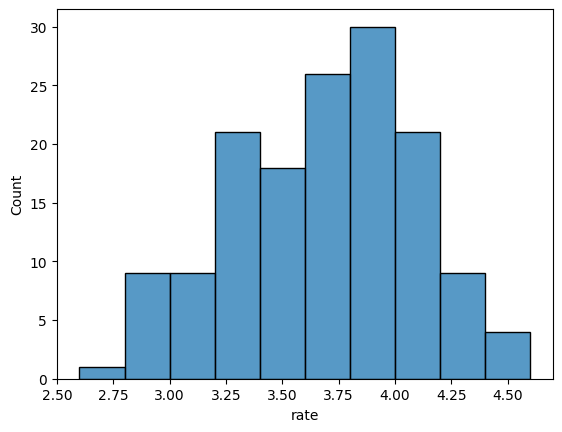

In [11]:
sns.histplot(dataframe, x='rate', bins=10)

This shows that majority of the restaurants received ratings range from 3.25 to 4.25

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

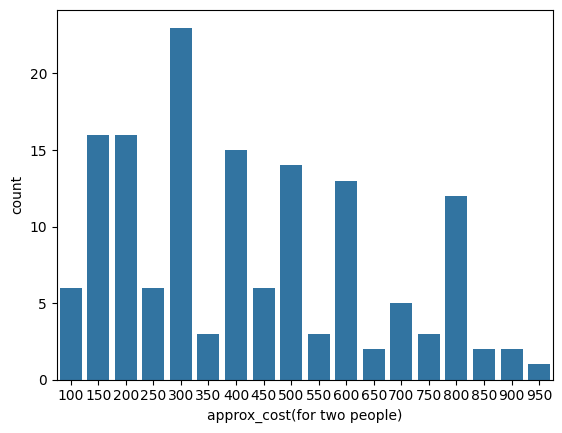

In [12]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [13]:
sum_of_cost_couple_data = couple_data.sum()
avg_of_cost_couple_data = sum_of_cost_couple_data / couple_data.count()
print(avg_of_cost_couple_data)

418.2432432432432


From above plot and code snippet we conclude that majority of the couple spend 300 and total average cost spend by couple is around 418.

<Axes: xlabel='online_order', ylabel='rate'>

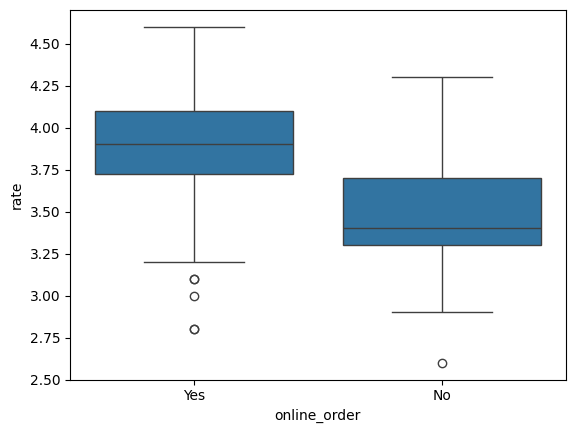

In [14]:
sns.boxplot(dataframe, x='online_order', y='rate')

From the above box plot we conclude that offline orders received avg rating around ~ 3.25 and online orders received avg rating around ~ 3.9.
So, online orders reveived higher rating than offline orders.

In [15]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

In [16]:
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


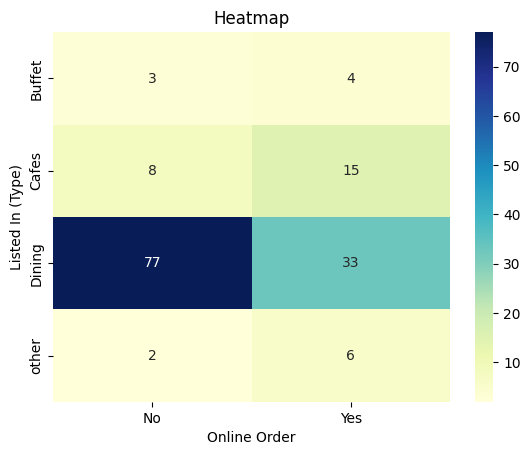

In [17]:
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

From the heatmap we could conclude that dining restaurants primarily accept offline orders than online orders and cafes primarily accepts online orders than offline orders.